Neste breve notebook, fazemos uma simples análise dos dados das edições do projeto Newston Jornal da Universidade Estadual de Maringá. Para mais informações sobre o projeto, ver "Newston Jornal — Um jornal de divulgação científica e cultural" (código 841/2021) http://www.sgp.uem.br:8080/sgpex/.

Os dados analisados foram extraídos das edições publicadas no Newston, disponíveis em https://drive.google.com/drive/folders/1FbL4MqIMpF6chux5QbDVhHFrDrhzHxMa?usp=sharing.

# 0. Células-Chave

In [8]:
import numpy as np               # importa a biblioteca Numpy para cálculos numéricos
import pandas as pd              # importa a biblioteca Pandas para análises de dados
import matplotlib.pyplot as plt  # importa o módulo Pyplot da biblioteca Matplotlib para confecção de gráficos.

In [9]:
figsize=(3.5, 2.5)

# Ajustar o tamanho da fonte para padrões de artigo
plt.rcParams.update({
        'font.size': 10,           # Tamanho da fonte
        'axes.titlesize': 10,      # Tamanho da fonte do título
        'axes.labelsize': 9,       # Tamanho da fonte dos rótulos
        'xtick.labelsize': 8,      # Tamanho da fonte dos ticks x
        'ytick.labelsize': 8,      # Tamanho da fonte dos ticks y
        'legend.fontsize': 8,      # Tamanho da fonte da legenda
        'figure.figsize': figsize  # Tamanho da figura
    })

# 1. Visualização dos Dados

Começamos importando os dados dos arquivos .csv como DataFrames da biblioteca Pandas.

In [10]:
df_edit = pd.read_csv('newston_edit.csv')          # lê o arquivo .csv das edições
df_participantes = pd.read_csv('newston_part.csv') # lê o arquivo .csv dos participantes

Agora podemos visualizar os dados com os DataFrames.

In [11]:
df_edit # mostra o DataFrame de edições

,Unnamed: 0,Edição,Textos,Textos de Física,Textos de Outras Áreas,Data,Número de Participantes,Participantes de Outras Áreas
0,0,1,7,5,2,11/2018,9,2
1,1,2,5,3,2,01/2019,6,0
2,2,3,8,6,2,04/2019,9,2
3,3,4,6,4,2,06/2019,8,2
4,4,5,6,4,2,09/2019,9,2
5,5,6,4,2,2,12/2019,9,3
6,6,7,5,2,3,04/2020,11,3
7,7,8,6,3,3,08/2020,9,3
8,8,9,5,3,2,10/2020,9,3
9,9,10,5,2,3,12/2020,10,3


In [12]:
df_participantes # mostra o DataFrame de participantes

,Participante,Textos,Edições,Área,Categoria
0,Participante A,7,8,Outro,De 3 a 10 Edições
1,Participante B,1,5,Física,De 3 a 10 Edições
2,Participante C,1,2,Física,Menos que 3 Edições
3,Participante D,3,5,Física,De 3 a 10 Edições
4,Participante E,14,14,Física,Mais que 10 Edições
5,Participante F,1,1,Física,Menos que 3 Edições
6,Participante G,2,18,Outro,Mais que 10 Edições
7,Participante H,1,2,Física,Menos que 3 Edições
8,Participante I,12,17,Física,Mais que 10 Edições
9,Participante J,2,4,Física,De 3 a 10 Edições


Acima, devemos chamar atenção para o fato de que os participantes identificados por letras alfabéticas não se encontram na mesma ordem dos participantes dos questionário. No caso, adotamos essa identificação para evitar ao máximo possíveis confusões.

Para eventual uso, segue o código que os converte em comandos para serem usados em $\LaTeX$ como tabelas.

In [13]:
# gera uma tabela em LaTeX com o DataFrame
latex_code = df_edit.to_latex(index=True, caption="Dados das Edições", label="tab:dados_edições")

# Salvando o código LaTeX em um arquivo
with open("edições.tex", "w") as f:
    f.write(latex_code)

# Exibe o LaTeX gerado
print(latex_code)

\begin{table}
\caption{Dados das Edições}
\label{tab:dados_edições}
\begin{tabular}{lrrrrrlrr}
\toprule
 & Unnamed: 0 & Edição & Textos & Textos de Física & Textos de Outras Áreas & Data & Número de Participantes & Participantes de Outras Áreas \\
\midrule
0 & 0 & 1 & 7 & 5 & 2 & 11/2018 & 9 & 2 \\
1 & 1 & 2 & 5 & 3 & 2 & 01/2019 & 6 & 0 \\
2 & 2 & 3 & 8 & 6 & 2 & 04/2019 & 9 & 2 \\
3 & 3 & 4 & 6 & 4 & 2 & 06/2019 & 8 & 2 \\
4 & 4 & 5 & 6 & 4 & 2 & 09/2019 & 9 & 2 \\
5 & 5 & 6 & 4 & 2 & 2 & 12/2019 & 9 & 3 \\
6 & 6 & 7 & 5 & 2 & 3 & 04/2020 & 11 & 3 \\
7 & 7 & 8 & 6 & 3 & 3 & 08/2020 & 9 & 3 \\
8 & 8 & 9 & 5 & 3 & 2 & 10/2020 & 9 & 3 \\
9 & 9 & 10 & 5 & 2 & 3 & 12/2020 & 10 & 3 \\
10 & 10 & 11 & 4 & 2 & 2 & 04/2021 & 7 & 2 \\
11 & 11 & 12 & 4 & 3 & 1 & 06/2021 & 8 & 1 \\
12 & 12 & 13 & 4 & 2 & 2 & 08/2021 & 10 & 3 \\
13 & 13 & 14 & 3 & 2 & 1 & 10/2021 & 8 & 2 \\
14 & 14 & 15 & 6 & 4 & 2 & 12/2021 & 9 & 2 \\
15 & 15 & 16 & 5 & 3 & 2 & 05/2022 & 10 & 1 \\
16 & 16 & 17 & 4 & 3 & 1 & 08/20

In [14]:
# gera uma tabela em LaTeX com o DataFrame
latex_code = df_participantes.to_latex(index=True, caption="Participantes das Edições", label="tab:dados_participantes")

# Salvando o código LaTeX em um arquivo
with open("participantes.tex", "w") as f:
    f.write(latex_code)

# Exibe o LaTeX gerado
print(latex_code)

\begin{table}
\caption{Participantes das Edições}
\label{tab:dados_participantes}
\begin{tabular}{llrrll}
\toprule
 & Participante & Textos & Edições & Área & Categoria \\
\midrule
0 & Participante A & 7 & 8 & Outro & De 3 a 10 Edições \\
1 & Participante B & 1 & 5 & Física & De 3 a 10 Edições \\
2 & Participante C & 1 & 2 & Física & Menos que 3 Edições \\
3 & Participante D & 3 & 5 & Física & De 3 a 10 Edições \\
4 & Participante E & 14 & 14 & Física & Mais que 10 Edições \\
5 & Participante F & 1 & 1 & Física & Menos que 3 Edições \\
6 & Participante G & 2 & 18 & Outro & Mais que 10 Edições \\
7 & Participante H & 1 & 2 & Física & Menos que 3 Edições \\
8 & Participante I & 12 & 17 & Física & Mais que 10 Edições \\
9 & Participante J & 2 & 4 & Física & De 3 a 10 Edições \\
10 & Participante K & 1 & 1 & Física & Menos que 3 Edições \\
11 & Participante L & 0 & 5 & Outro & De 3 a 10 Edições \\
12 & Participante M & 1 & 1 & Outro & Menos que 3 Edições \\
13 & Participante N & 1 & 1 & Fí

# 2. Análise dos Dados

Agora plotamos alguns gráficos para melhor visualizar e discutir as informações dos dados.

## a) Dados das Edições

Nesta subseção, faremos a visualização dos dados referentes às edições. No caso, para cada edição, analisaremos

            i) nº de textos;
           ii) distribuição de textos;
          iii) distribuição de textos de outras áreas.



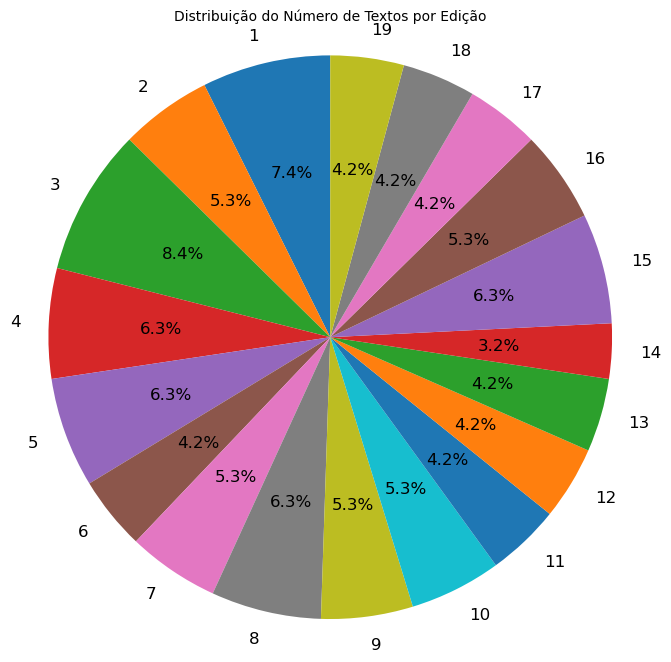

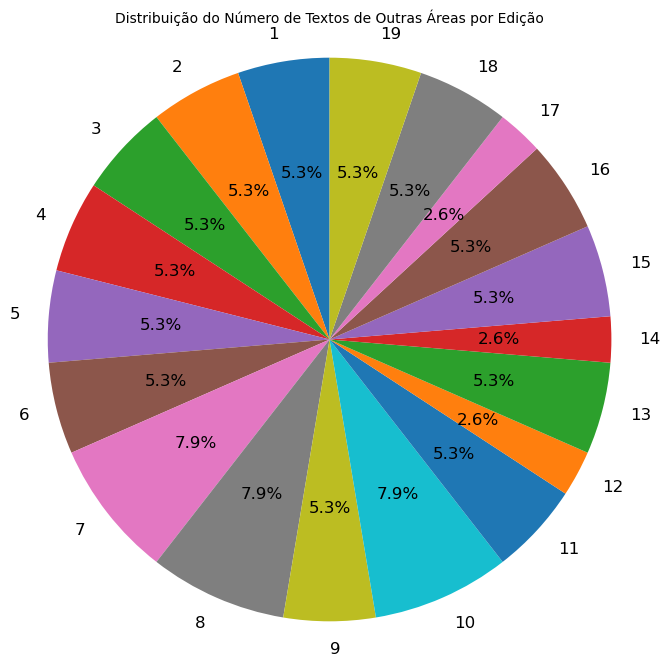

In [15]:
# Gráfico de pizza para textos por edição
plt.figure(figsize=(8, 8))  # define uma figura de tamanho 8 x 8
plt.pie(df_edit['Textos'], labels=df_edit['Edição'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}) # faz o gráfico de pizza

# Legendas
plt.title('Distribuição do Número de Textos por Edição') # define o título
plt.axis('equal')                                        # opção de gráfico redondo
plt.savefig(f'figuras/textos_por_edições_pizza.png')     # salva o gráfico como uma imagem
plt.show()                                               # exibe o gráfico

#######################################################################################################################################

# Gráfico de pizza para textos de outras áreas por edição
plt.figure(figsize=(8, 8))
plt.pie(df_edit['Textos de Outras Áreas'], labels=df_edit['Edição'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}) # faz o gráfico de pizza

# Legendas
plt.title('Distribuição do Número de Textos de Outras Áreas por Edição') # título
plt.axis('equal')                                        # opção de gráfico redondo
plt.savefig(f'figuras/outras_áreas_edições_pizza.png')   # salva o gráfico como uma imagem
plt.show()                                               # exibe o gráfico

Os gráficos de pizza acima sugerem que várias edições se encontram em mesma categoria. Note por exemplo a abundância de porcentagens repetidas, como $5,3\%$ para textos de outras áreas e $4,2\%$ para o número de textos. Isso pode ser ainda melhor visualizado na forma de histogramas, como feito a seguir.

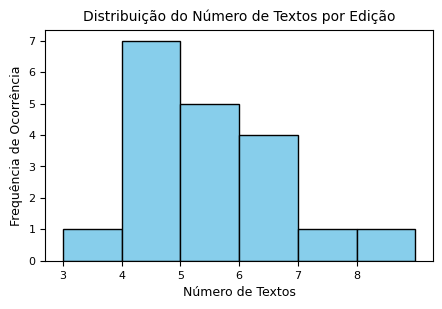

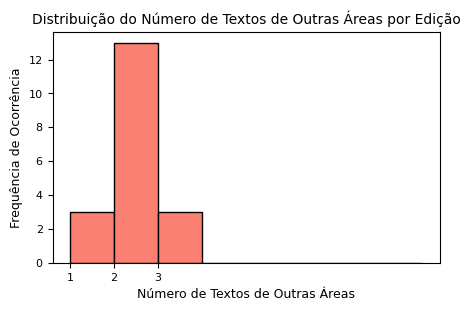

In [16]:
# Histograma para a distribuição de número de textos por edição
plt.figure(figsize=(5, 3)) # gera uma figura de tamanho 5 x 3

# plota o histograma
plt.hist(df_edit['Textos'], bins=range(min(df_edit['Textos']), max(df_edit['Textos']) + 2), edgecolor='black', color='skyblue')

# Legendas
plt.xlabel('Número de Textos')                                                          # legenda do eixo x
plt.ylabel('Frequência de Ocorrência')                                                  # legenda do eixo y
plt.title('Distribuição do Número de Textos por Edição')                                # título do plot
plt.xticks(range(min(df_edit['Textos']), max(df_edit['Textos']) + 1))                   # Ajusta os rótulos do eixo x
plt.savefig(f'figuras/edições_textos_distribuição.png', bbox_inches='tight', dpi=300)   # salva o gráfico como uma imagem
plt.show()                                                                              # mostra o plot

#######################################################################################################################################

# Histograma para a distribuição de número de textos de outras áreas por edição

plt.figure(figsize=(5, 3)) # gera uma figura de tamanho 5 x 3

# plota o histograma
plt.hist(df_edit['Textos de Outras Áreas'], bins=range(min(df_edit['Textos de Outras Áreas']), max(df_edit['Textos']) + 2), edgecolor='black', color='salmon')

# Legendas
plt.xlabel('Número de Textos de Outras Áreas')                                                         # legenda do eixo x
plt.ylabel('Frequência de Ocorrência')                                                                 # legenda do eixo y
plt.title('Distribuição do Número de Textos de Outras Áreas por Edição')                               # título do plot
plt.xticks(range(min(df_edit['Textos de Outras Áreas']), max(df_edit['Textos de Outras Áreas']) + 1))  # Ajusta os rótulos do eixo x
plt.savefig(f'figuras/edições_outras_áreas_distribuição.png', bbox_inches='tight', dpi=300)            # salva o gráfico como uma imagem
plt.show()                                                                                             # mostra o plot

A alta ocorrência de valores similares sugere então que, para uma melhor visualização e discussão, convém agrupar as edições em categorias de acordo com a produção de textos e participação em textos. isso é implementado a seguir.

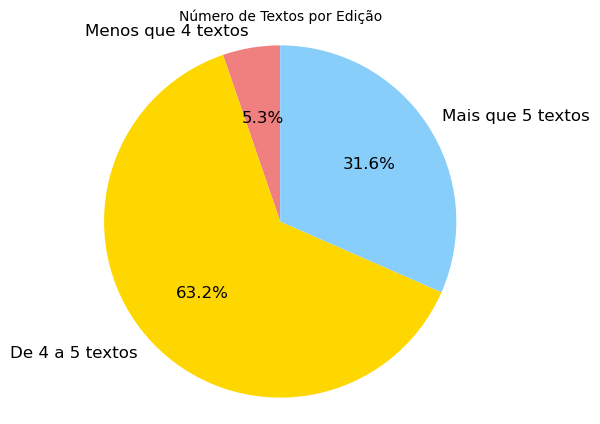

In [17]:
# Categorias para o número de textos
categorias = ['Menos que 4 textos', 'De 4 a 5 textos', 'Mais que 5 textos']     # define as três possíveis categorias
contagem_categorias = [0, 0, 0]                                                 # define uma lista para fazer a contagem

# Loop para classificar as edições em cada categoria
for textos in df_edit['Textos']:
    # 1ª categoria
    if textos < 4:
        contagem_categorias[0] += 1 # adiciona 1 ao contador
    # 2ª categoria
    elif 4 <= textos <= 5:
        contagem_categorias[1] += 1 # adiciona 1 ao contador
    # 3ª categoria
    else:
        contagem_categorias[2] += 1 # adiciona 1 ao contador

# Gráfico de pizza para o número de textos por categoria
plt.figure(figsize=(5, 5)) # gera uma figura de tamanho 8 x 8

# gráfico de pizza
plt.pie(contagem_categorias, labels=categorias, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'gold', 'lightskyblue'], textprops={'fontsize': 12})

# Legendas
plt.title('Número de Textos por Edição')                                                  # define o título
plt.axis('equal')                                                                         # opção de gráfico de pizza redondo
plt.savefig(f'figuras/edições_textos_pizza_categoria.png', bbox_inches='tight', dpi=300)  # salva o gráfico como uma imagem
plt.show()                                                                                # exibe o plot

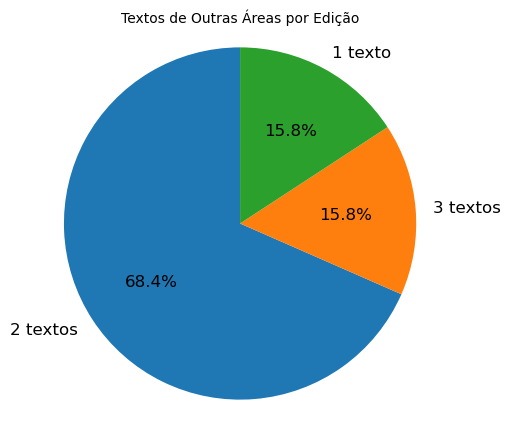

In [18]:
# Categorias para o número de textos de outras áreas
categorias_outras_areas = df_edit['Textos de Outras Áreas'].map(
    lambda x: '1 texto' if x == 1 else '2 textos' if x == 2 else '3 textos'
)

# Contagem das categorias
contagem_categorias = categorias_outras_areas.value_counts()

# Comando para o gráfico de pizza

# Gráfico de pizza para o número de textos de outras áreas por categoria
plt.figure(figsize=(5, 5)) # gera uma figura de tamanho 8 x 8

# gráfico de pizza
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Legendas
plt.title('Textos de Outras Áreas por Edição')                                               # define o título
plt.axis('equal')                                                                            # opção de gráfico de pizza redondo
plt.savefig(f'figuras/edições_outras_áreas_categoria.png', bbox_inches='tight', dpi=300)     # salva o gráfico como uma imagem
plt.show()                                                                                   # exibe o plot

Vemos então que a maior parte das edições ($68,4\%$) possuiu 2 textos de outras áreas publicados, evidenciando de forma consistente o caráter multidisciplinar do Newston. No caso da publicação do total de textos, vemos a dominância por parte das edições de 4 a 5 textos, sendo este o tamanho da edição típica. As outras categorias provavelmente se referem a exceções como edições com menor número de pessoal/edições especiais. Por este motivo, sugerimos para projetos/jornais similares ao Newston uma publicação típica de 4 a 5 textos, de forma a não sobrecarregar a equipe, ao mesmo tempo em que se mantém uma constância de publicações.

## b) Dados dos Participantes

Nesta subseção, analisamos os dados referentes ao participantes. Em particular, para cada participante, analisamos

      i) Número de edições por produzido;

     ii) Número de textos produzido;

    iii) Sua área.

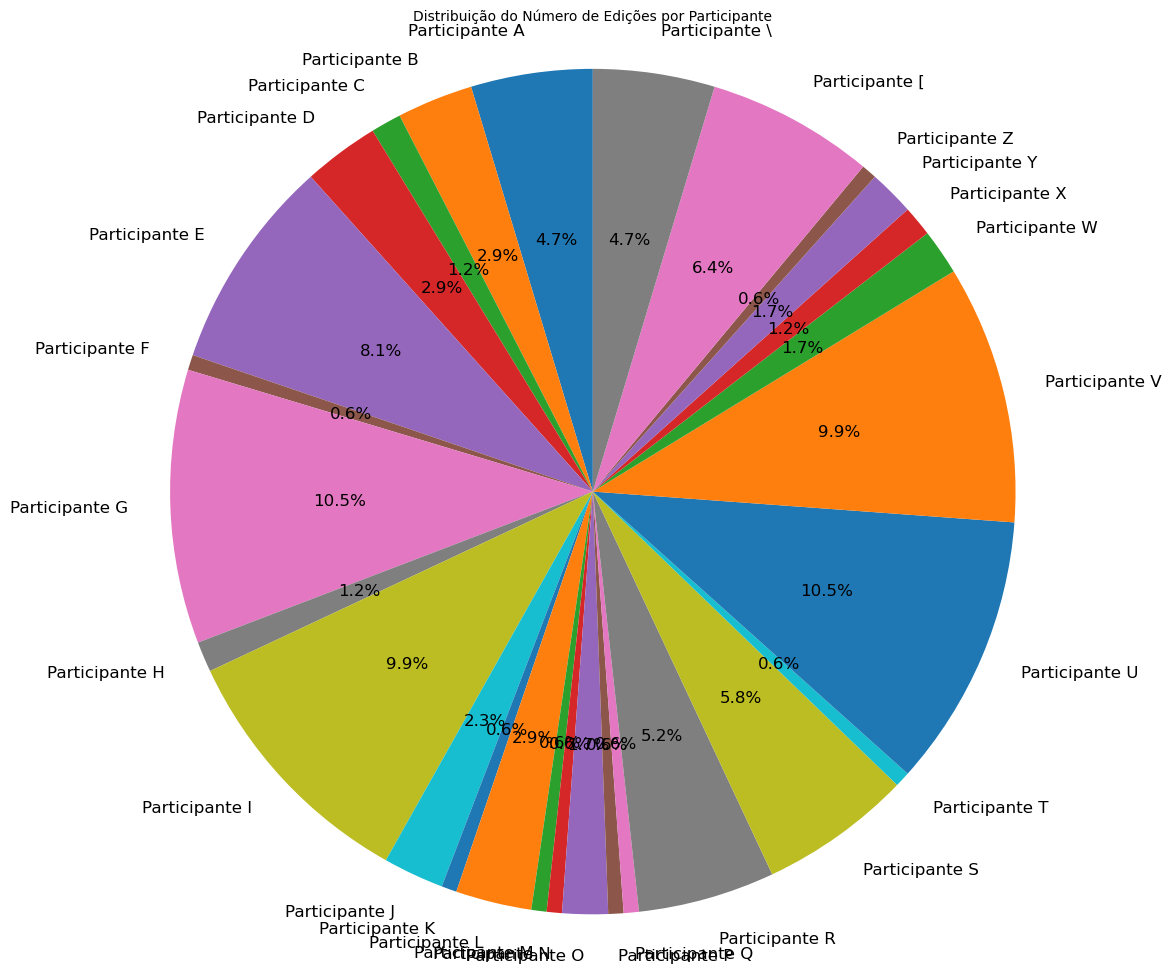

In [19]:
# Gráfico de pizza de edições por participante

plt.figure(figsize=(12, 12)) # gera uma figura de tamanho 12 x 12

# gera o gráfico
plt.pie(df_participantes['Edições'], labels=df_participantes['Participante'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Legenda
plt.title('Distribuição do Número de Edições por Participante')       # título
plt.axis('equal')                                                     # opção de gráfico redondo
plt.savefig(f'figuras/participantes_edições_pizza.png')               # salva o gráfico como uma imagem
plt.show()                                                            # exibe o gráfico

O gráfico de pizza acima mostra claramente que a maioria dos participantes do Newston trabalhou em poucas edições, com uma minoria tendo presença em diversas edições. Alguns casos específicos apresentam mais de $10\%$ de todas as participações, por exemplo. Aqui, é válido ressaltar mais uma vez que os participantes identificados por letras alfabéticas não se encontram na mesma ordem dos participantes dos questionário

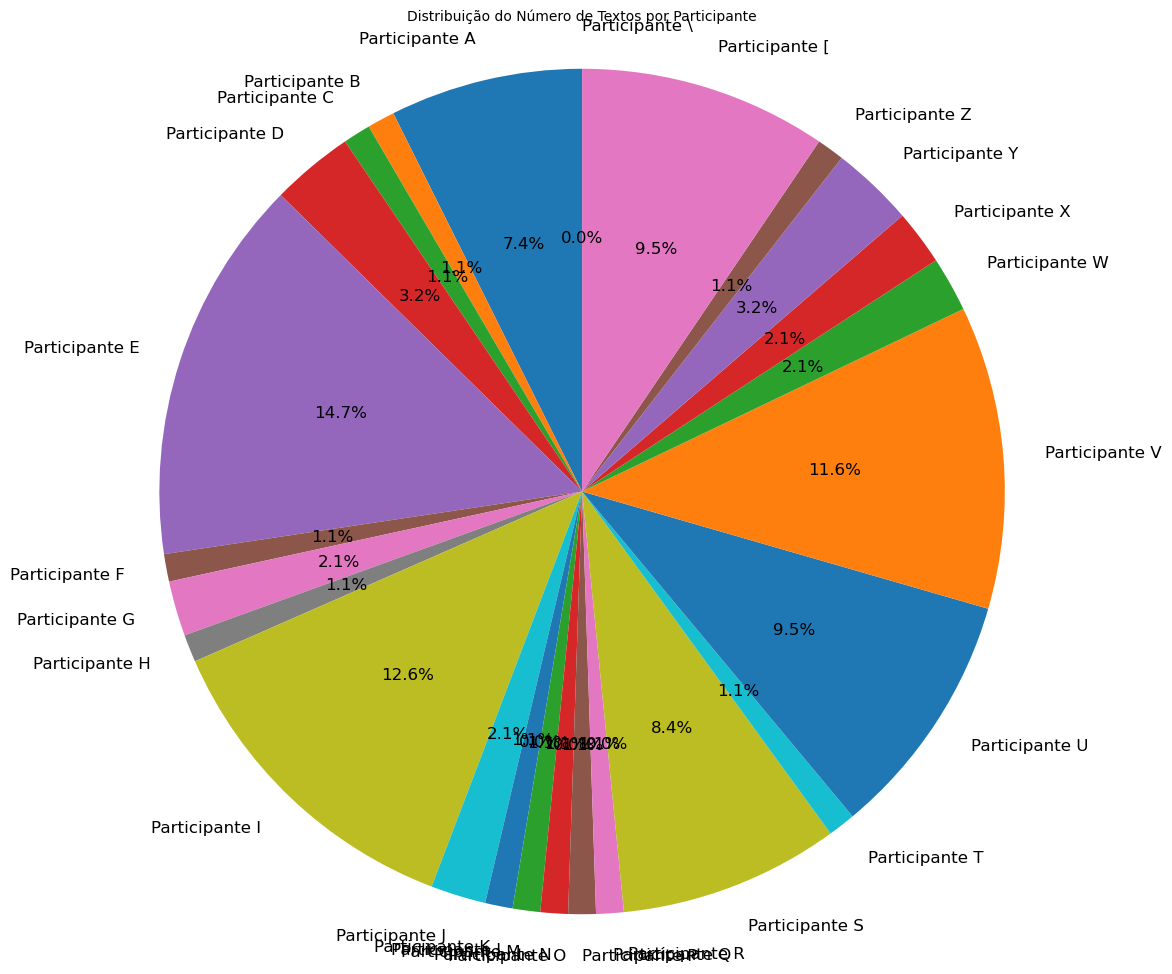

In [20]:
# Gráfico de pizza de textos por participante

plt.figure(figsize=(12, 12))  # define uma figura de tamanho 12 x 12

# gera o gráfico
plt.pie(df_participantes['Textos'], labels=df_participantes['Participante'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}) # faz o plot

# Legendas
plt.title('Distribuição do Número de Textos por Participante')    # título
plt.axis('equal')                                                 # opção de gráfico redondo
plt.savefig(f'figuras/participantes_textos_pizza.png')            # salva o gráfico como uma imagem
plt.show()                                                        # exibe o gráfico

O gráfico acima reforça o comentário anterior. Pode-se ver que uma minoria de participantes escreveu a maior parte dos textos, com alguns casos constando mais de $10\%$ do total de todos os textos produzidos. Além disso, a grande maioria dos participantes contribuiu com pouquíssimos textos. Aqui, insistimos mais uma vez: os participantes identificados pelas letras alfabéticas não se encontram na mesma ordem dos participantes dos questionários.

Para melhor visualizar os pontos acima, decidimos também plotar os histogramas da distribuição de participação em edições e produção de textos.

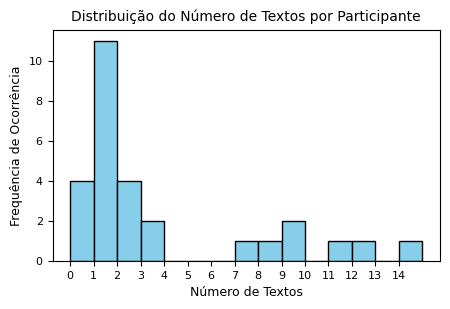

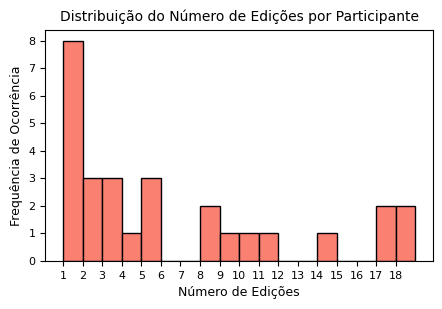

In [21]:
# Histograma para a distribuição de número de textos por participante
plt.figure(figsize=(5, 3)) # gera uma figura de tamanho 5 x 3

# plota o histograma
plt.hist(df_participantes['Textos'], bins=range(min(df_participantes['Textos']), max(df_participantes['Textos']) + 2), edgecolor='black', color='skyblue')

# Legendas
plt.xlabel('Número de Textos')                                         # legenda do eixo x
plt.ylabel('Frequência de Ocorrência')                                 # legenda do eixo y
plt.title('Distribuição do Número de Textos por Participante')         # título do plot
plt.xticks(range(min(df_participantes['Textos']), max(df_participantes['Textos']) + 1))  # Ajusta os rótulos do eixo x
plt.savefig(f'figuras/participantes_textos_distribuição.png', bbox_inches='tight', dpi=300)          # salva o gráfico como uma imagem
plt.show()                                                             # mostra o plot

#######################################################################################################################################

# Histograma para a distribuição de edições por participante

plt.figure(figsize=(5, 3)) # gera uma figura de tamanho 5 x 3

# plota o histograma
plt.hist(df_participantes['Edições'], bins=range(min(df_participantes['Edições']), max(df_participantes['Edições']) + 2), edgecolor='black', color='salmon')

# Legendas
plt.xlabel('Número de Edições')                                                                        # legenda do eixo x
plt.ylabel('Frequência de Ocorrência')                                                                 # legenda do eixo y
plt.title('Distribuição do Número de Edições por Participante')                                        # título do plot
plt.xticks(range(min(df_participantes['Edições']), max(df_participantes['Edições']) + 1))              # Ajusta os rótulos do eixo x
plt.savefig(f'figuras/participantes_edições_distribuição.png', bbox_inches='tight', dpi=300)           # salva o gráfico como uma imagem
plt.show()                                                                                             # mostra o plot

Acima, notamos três grupos isolados, identificados pelas "ilhas" nos histogramas. Os gráficos então mostram claramente que os participantes podem ser classificados em três categorias, de acordo com a produção de textos/participação em edições, a qual implementamos a seguir.

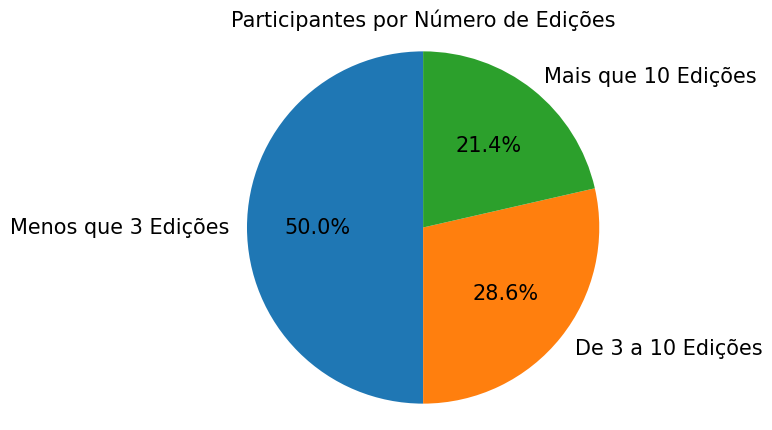

In [22]:
# definindo os "cortes" para as categorias
a = 3
b = 10

# Classificando os participantes em 3 categorias com base no número de edições
df_participantes['Categoria'] = pd.cut(df_participantes['Edições'], bins=[-float('inf'), a, b, float('inf')],
                         labels=['Menos que '+ str(a) + ' Edições',
                                 f'De {a} a {b} Edições',
                          'Mais que ' + str(b) + ' Edições'])

# Contabilizando as categorias
contagem = df_participantes['Categoria'].value_counts()

# Gerando o gráfico de pizza
plt.figure(figsize=(5, 5)) # gera uma figura de tamanho 7 x 7

# gera o gráfico
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':15})

plt.title('Participantes por Número de Edições', fontsize=15)                                    # título
plt.axis('equal')                                                                                # opção de gráfico circular
plt.savefig(f'figuras/participantes_edições_pizza_categoria.png', bbox_inches='tight', dpi=300)  # salva o gráfico como uma imagem
plt.show()                                                                                       # exibe o gráfico

/tmp/ipykernel_25476/3783865398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Categoria'] = pd.cut(df_new['Textos'], bins=[-float('inf'), m, n, float('inf')],


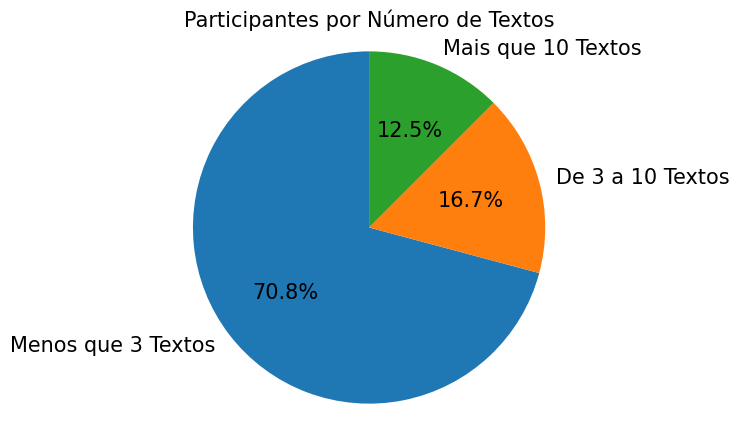

In [23]:
# definindo os "cortes" para as categorias
m = 3
n = 10

# define um novo DataFrame para os participantes que produziram textos
df_new = df_participantes[df_participantes['Textos'] > 0]

# esse loop os participantes em 3 categorias com base no número de textos
df_new['Categoria'] = pd.cut(df_new['Textos'], bins=[-float('inf'), m, n, float('inf')],
                         labels=['Menos que '+ str(m) + ' Textos',
                                 f'De {m} a {n} Textos',
                          'Mais que ' + str(n) + ' Textos'])

# Contabilizando as categorias
contagem = df_new['Categoria'].value_counts()

# Gerando o gráfico de pizza
plt.figure(figsize=(5, 5)) # gera uma figura de tamanho 5 x 5

# gera o gráfico
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':15})

# Legendas
plt.title('Participantes por Número de Textos', fontsize=15)                                    # título
plt.axis('equal')                                                                               # opção de gráfico circular
plt.savefig(f'figuras/participantes_textos_pizza_categoria.png', bbox_inches='tight', dpi=300)  # salva o gráfico como uma imagem
plt.show()                                                                                      # exibe o gráfico

Os gráficos de pizza acima mostram uma mensagem muito clara: os participantes do Newston podem ser agrupados em três categorias: baixa participação, média participação e alta participação.

A grande maioria se enquandra na primeira: baixa participação. Esses são os casos de pessoas que produziram 1 texto ou colaboraram com uma edição e sairam do projeto. O segundo caso se refere ao processo natural: pessoas que colaboram por um certo período, mas saíram do projeto devido a motivos diversos.

O terceiro caso se refere a participantes que permaneceram por quase toda a história do Newston. São esses colaboradores que permaneceram no jornal mesmo após terem se formado e entrado para a pós-graduação.

Os pontos e gráficos acima mostram claramente o maior problema do Newston como projeto: a falta de renovação de membros. Esse ponto deve ser visto com atenção por projetos similares ao Newston, os quais recomendamos fazer seleções de pessoal periodicamente. Note entretanto que tal falha não se refere a um problema de metodologia do Newston, sendo uma falha organizaciona, a qual também foi intensificada pela pandemia, tal como apontado na seção anterior.

Para fechar, fazemos agora um gráfico de pizza com as áreas dos diversos participantes.

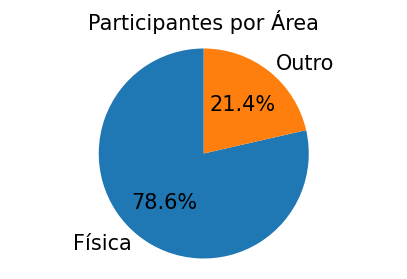

In [24]:
# Distribuição das áreas entre os participantes

# esse loop aumenta um contador para cada participante que não era de Física
contagem = df_participantes['Área'].apply(lambda x: 'Física' if x == 'Física' else 'Outro').value_counts()

# Gerando o gráfico de pizza
plt.figure(figsize=(5, 3))      # gera uma figura de tamanho 5 x 3

# gera o gráfico
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':15})

# Legenda
plt.title('Participantes por Área', fontsize=15)                                     # título
plt.axis('equal')                                                                    # opção de gráfico circular
plt.savefig(f'figuras/participantes_areas_pizza.png', bbox_inches='tight', dpi=300)  # salva o gráfico como uma imagem
plt.show()                                                                           # exibe o gráfico

O gráfico acima demonstra claramente a interdisciplinaridade do Newston como projeto: cerca de $20\%$ dos participantes eram de outras áreas além da Física. Ou seja, para cada 4 estudantes de Física, um era de algum outro curso. Esse fato é extremamente positivo, levando a interações entre diferentes áreas que não ocorrem em projetos acadêmicos usuais, como Iniciações Científicas, Programas de Iniciação à Docência, etc.

## c) Evolução Temporal

Os gráficos acima analisam as informações do projeto ao longo de toda a sua história. Entretanto, também é interessante verificar com a quantidade de textos e participantes se comportou ao longo das edições e suas correlações, as quais invesigamos nessa subseção.

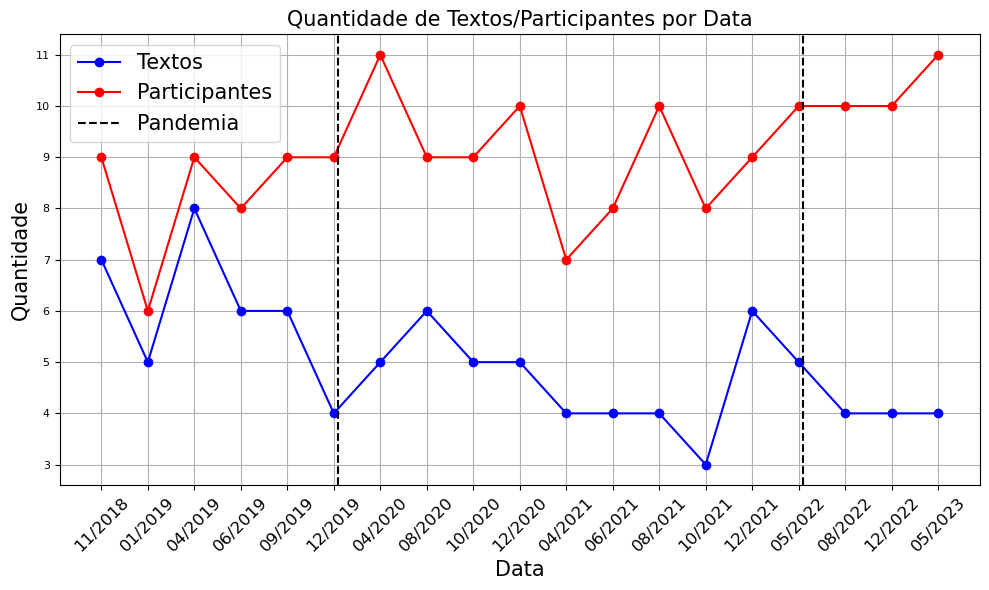

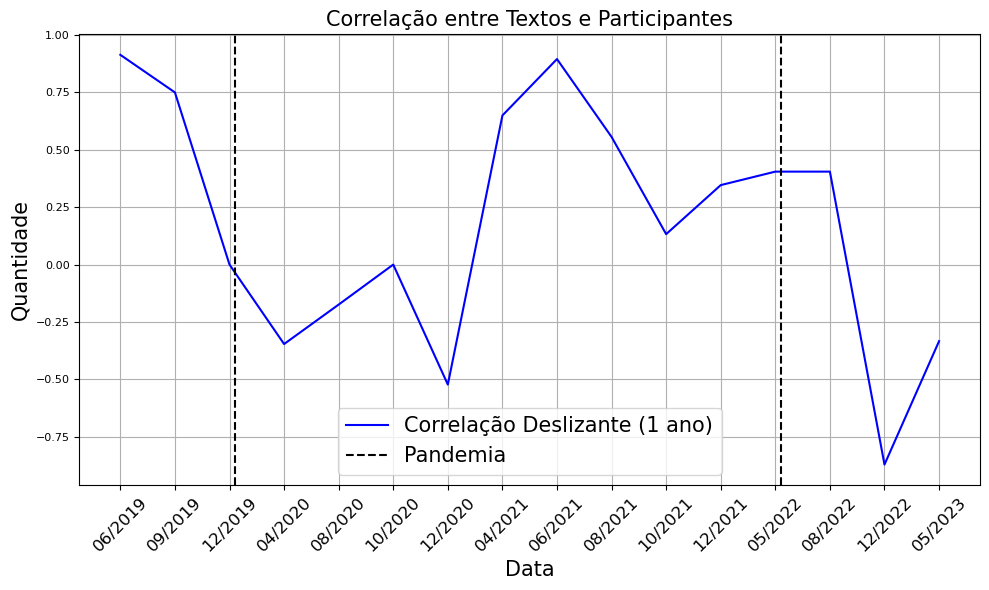

Correlação entre textos e participantes: -0.03512500866571044


In [25]:
# Gráficos de Série Temporal

# gera uma figura de tamanho 10 x 6
fig, ax = plt.subplots(figsize=(10, 6))

# textos por edição
ax.plot(df_edit['Data'], df_edit['Textos'], marker='o', linestyle='-', color='b', label='Textos')

# número de participantes por edição
ax.plot(df_edit['Data'], df_edit['Número de Participantes'], marker='o', linestyle='-', color='r', label='Participantes')

# intervalo da pandemia
ax.axvline(x = 5.1, color='black', linestyle='--', label = 'Pandemia') # plota uma linha vertical em 01/2020
ax.axvline(x = 15.1, color='black', linestyle='--')                    # plota uma linha vertical em 01/2022

# Legendas
plt.title("Quantidade de Textos/Participantes por Data", fontsize='15')  # título
plt.xlabel("Data", fontsize='15')                                        # nome do eixo x
plt.ylabel("Quantidade", fontsize='15')                                  # nome do eixo y
plt.xticks(rotation=45, fontsize='12')                                   # marcações do eixo x
plt.grid(True)                                                           # exibe o quadriculado do gráfico

# Exibindo o gráfico
plt.tight_layout()                                        # exibição compacta
plt.legend(fontsize='15', loc='best')                     # exibe as legendas
plt.savefig(f'figuras/sérietemporal.png')                 # salva o gráfico como uma imagem
plt.show()                                                # exibe o gráfico

###########################################################################################################################################

# Correlação entre Textos e nº de participantes

# Calculando a correlação deslizante (janela de 4 edições, média de edições por ano)
rolling_corr = df_edit['Textos'].rolling(window=4).corr(df_edit['Número de Participantes'])

# gera uma figura de tamanho 10 x 6
fig, ax = plt.subplots(figsize=(10, 6))

# Correlação Deslizante por ano
ax.plot(df_edit["Data"], rolling_corr, label="Correlação Deslizante (1 ano)", color="blue")

# intervalo da pandemia
ax.axvline(x = 5.1, color='black', linestyle='--', label = 'Pandemia') # plota uma linha vertical em 01/2020
ax.axvline(x = 15.1, color='black', linestyle='--')                    # plota uma linha vertical em 01/2022

# Legendas
plt.title("Correlação entre Textos e Participantes",fontsize='15')  # título
plt.xlabel("Data", fontsize='15')                                   # nome do eixo x
plt.ylabel("Quantidade", fontsize='15')                             # nome do eixo y
plt.xticks(rotation=45, fontsize='12')                              # marcações do eixo x
plt.grid(True)                                                      # exibe o quadriculado do gráfico

# Exibindo o gráfico
plt.tight_layout()                                        # exibição compacta
plt.legend(fontsize='15', loc='best')                     # exibe as legendas
plt.savefig(f'figuras/correlação.png')                    # salva o gráfico como uma imagem
plt.show()                                                # exibe o gráfico

# Calculando a correlação total entre Textos e Participantes
correlation = df_edit['Textos'].corr(df_edit['Número de Participantes'])
print("Correlação entre textos e participantes:", correlation)  # printa o resultado

Os gráficos acima fornecem muita informação. Primeiramente, vemos uma alta correlação (deslizante) entre número de textos e participantes no começo do projeto; na pré-pandemia. Isso depois é perdido, mas é explicado com o fato de que, no começo do projeto, a maioria dos participantes era redator. Com o passar do tempo, entretanto, foi comum que outras funções ficassem mais especializadas e não publicassem tanto; cartunista, gestores de redes sociais, editores.

No período de pandemia, nota-se um declínio na produção de textos, com o mínimo global sendo atingido no final de 2021, sendo seguido de um aumento e eventual estagnação nos meses finais do projeto.

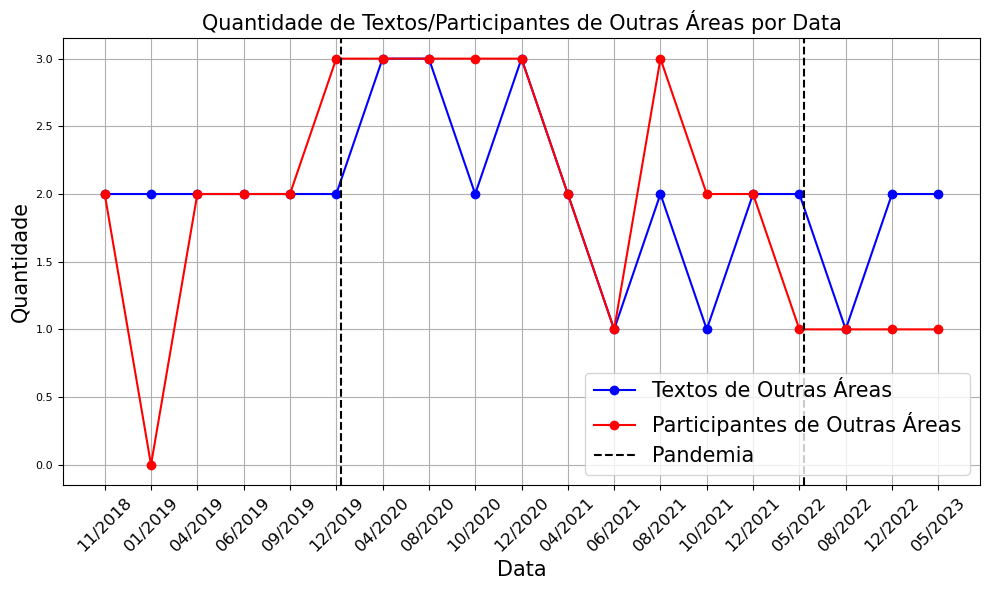

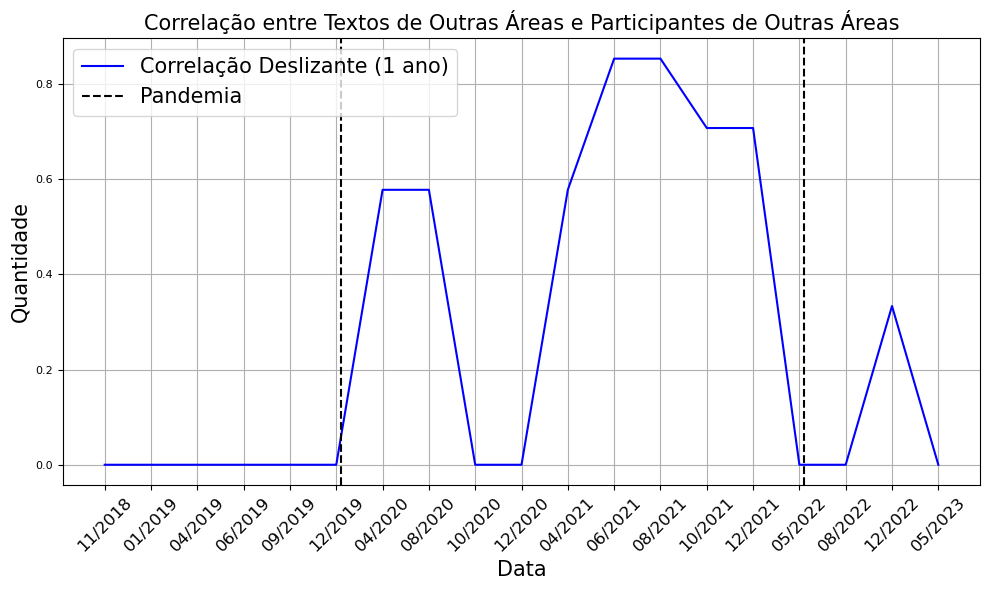

Correlação entre textos de outras áreas e participantes de outras áreas: 0.5279733596921354


In [26]:
# gera uma figura de tamanho 10 x 6
fig, ax = plt.subplots(figsize=(10, 6))

# textos de outras áreas por edição
ax.plot(df_edit['Data'], df_edit['Textos de Outras Áreas'], marker='o', linestyle='-', color='b', label='Textos de Outras Áreas')

# número de participantes por edição
ax.plot(df_edit['Data'], df_edit['Participantes de Outras Áreas'], marker='o', linestyle='-', color='r', label='Participantes de Outras Áreas')

# intervalo da pandemia
ax.axvline(x = 5.1, color='black', linestyle='--', label = 'Pandemia') # plota uma linha vertical em 01/2020
ax.axvline(x = 15.1, color='black', linestyle='--')                    # plota uma linha vertical em 01/2022

# Legendas
plt.title("Quantidade de Textos/Participantes de Outras Áreas por Data", fontsize='15')  # título
plt.xlabel("Data", fontsize='15')                         # nome do eixo x
plt.ylabel("Quantidade", fontsize='15')                   # nome do eixo y
plt.xticks(rotation=45, fontsize='12')                    # marcações do eixo x
plt.grid(True)                                            # exibe o quadriculado do gráfico

# Exibindo o gráfico
plt.tight_layout()                                        # exibição compacta
plt.legend(fontsize='15', loc='best')                     # exibe as legendas
plt.savefig(f'figuras/sérietemporal_outras_áreas.png')    # salva o gráfico como uma imagem
plt.show()                                                # exibe o gráfico

###########################################################################################################################################

# Correlação entre Textos e nº de participantes

# Calculando a correlação deslizante (janela de 4 edições, média de edições por ano)
rolling_corr = df_edit['Textos de Outras Áreas'].rolling(window=4).corr(df_edit['Participantes de Outras Áreas'])

# a list apresenta alguns valores indefinidos por algumas edições terem 0 participantes de outrás áreas. Essa linha os modifica para 0
rolling_corr = [0 if np.isnan(x) else x for x in rolling_corr]

# gera uma figura de tamanho 10 x 6
fig, ax = plt.subplots(figsize=(10, 6))

# Correlação Deslizante por ano
ax.plot(df_edit["Data"], rolling_corr, label="Correlação Deslizante (1 ano)", color="blue")

# intervalo da pandemia
ax.axvline(x = 5.1, color='black', linestyle='--', label = 'Pandemia') # plota uma linha vertical em 01/2020
ax.axvline(x = 15.1, color='black', linestyle='--')                    # plota uma linha vertical em 01/2022

# Legendas
plt.title("Correlação entre Textos de Outras Áreas e Participantes de Outras Áreas", fontsize='15')  # título
plt.xlabel("Data", fontsize='15')                         # nome do eixo x
plt.ylabel("Quantidade", fontsize='15')                   # nome do eixo y
plt.xticks(rotation=45, fontsize='12')                    # marcações do eixo x
plt.grid(True)                                            # exibe o quadriculado do gráfico

# Exibindo o gráfico
plt.tight_layout()                                        # exibição compacta
plt.legend(fontsize='15', loc='best')                     # exibe as legendas
plt.savefig(f'figuras/correlação_outras_áreas.png')       # salva o gráfico como uma imagem
plt.show()                                                # exibe o gráfico

# Calculando a correlação entre Textos de Outras Áreas e Participantes de Outras Áreas
correlation = df_edit['Textos de Outras Áreas'].corr(df_edit['Participantes de Outras Áreas'])
print("Correlação entre textos de outras áreas e participantes de outras áreas:", correlation)

O gráfico acima demonstra claramente o carácter multidisciplinar do Newston. Pode-se ver uma taxa consistente de publicação de textos de outras áreas. No começo, nota-se baixa correlação entre tais textos e a participação de integrantes de outras áreas. Isso se deve ao fato de que, no começo, os estudantes de Física eram maioria e publicavam textos de assuntos diversos. Entretanto, com o passar do tempo, participantes de outras áreas foram incluídos, contribuindo com textos de suas especialidades.

No quesito pandemia, ve-se que a produção de textos de outras áreas também atingiu seu mínimo global, com a quantidade de participantes de outras áreas também decaindo. De forma similar à análise anterior, nota-se uma estagnação nas edições finais publicadas pelo projeto.

# Conclusões

Neste notebook, foram discutidos os dados das edições ao longo da trajetória do Newston Jornal e de seus participantes. As análises feitas nos permitem entender o funcionamento e as dificuldades passadas pelo Newston, ao mesmo tempo gerando *insights* para possíveis iniciativas similares.

As análises mostraram claramente o declínio de produção nas edições durante o período da pandemia, atingindo o mínimo global de produção de textos. Viu-se também que as edições típicas possuíam de 4 a 5 textos, sendo essa uma sugestão de produção para jornais similares. Também se pode visualizar o caráter inter e multidisciplinar do Newston, o qual contou consistentemente com a produção de textos de outras (edição típica possuindo 2), a qual se encontra correlacionada com a inclusão de membros de outras áreas.

No que diz respeito aos participantes, o uso de histogramas e gráficos de pizza permitiu separá-los em categorias e traçar três perfis: baixa produtividade, média produtividade e alta produtividade. A presença esmagadora da primeira categoria ilustra o problema da baixa renovação de membros do Newston, o qual pode ser remediado em projetos similares com processos seletivos periódicos. Aqui, enfatizamos novamente que essa deficiência é de caráter organizacional e não metodológico, não sendo portanto uma crítica contra esse modelo de projeto em específico.